# Introduction

Hello, I am Akshar Solanki and I am very excited to be here. I would like to thank all of you for giving me an opportunity to present my project. I am very passionate about Data Analytics and love to find insights from data. I generally follow a structured and statistical approach to solving problems. I came across this dataset when I had enrolled in Pattern Recognition Data Mining course at Santa Clara University. After identifying the problem statement, I always create a process flowchart that explains my approach in brief. 

## Problem Statement

Air pollution refers to the release of pollutants into the air that are
detrimental to human health and the planet as a whole. It has been proven through
studies that air pollution directly affects the temperature of a location. Energy production
and transportation are one of the major causes of air pollution. The burning of fossil
fuels leads to release of various harmful and hazardous chemicals into the atmosphere.
These chemicals along with pressure, wind, altitude and oceanic movement affect the
temperature of a specific location. The main aim of this project is to analyze the relation between
temperature and concentration of some of these pollutants in the
atmosphere. Moreover, this project also emphasizes on the importance of Feature Creation in Data Mining.

##### Objective
The main objective of this project is to analyze whether concentration of pollutants in the atmosphere has an effect on the temperature and whether this data can be used to predict the temperature.

## Data

The Data was downloaded from the UCI Repository for Machine Learning. It is one of the best places to source real-world datasets. This data set includes hourly air pollutants data from 12 nationally-controlled air-quality monitoring sites. The air-quality data are from the Beijing Municipal Environmental Monitoring Center. The time period is from March 1st, 2013 to February 28th, 2017. Missing data are denoted as NA. 

Source - https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data#

Since data was sourced from 12 different monitoring stations, the data was categorized into 12 different .csv files. Each of the .csv files had the following data attributes/columns:

1. No - Row Number
2. Year - year of measurement
3. Month - month of measurement
4. Day - day of measurement
5. Hour - hour of measurement
6. PM2.5 - concentration of PM2.5 (μg/m3)
7. PM10 - concentration of PM10 (μg/m3)
8. SO2 - concentration of SO2 (μg/m3)
9. NO2 - concentration NO2 (μg/m3)
10. CO - concentration of CO (μg/m3)
11. O3 - concentration of O3 (μg/m3)
12. TEMP - temperature (degree Celsius)
13. PRES - pressure (hPa)
14. DEWP - dew point temperature (degree Celsius)
15. RAIN - precipitation (mm)
16. Wd - wind direction
17. WSPM - wind speed (m/s)
18. Station - name of the city/air-quality monitoring site

Size of the Dataset:
1. Number of attributes (columns) = 18
2. Number of data samples (rows) / monitoring station = 35064
3. Number of Regions: 12

Total Instances = 18 * 35064 * 12 = 7,573,824

###### After understanding the types of attributes better, I was able to create a process flowchart as follows: 

![Process Flowchart](flowchart.png)

## Preprocess Data

Importing the required Python Libraries

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing

Importing data of the .csv files into different Pandas DataFrames. Appending the DataFrames into one huge DataFrame.

In [2]:
data1 = pd.read_csv('..//Data//Original Data//PRSA_Data_Aotizhongxin_20130301-20170228.csv')
data2 = pd.read_csv('..//Data//Original Data//PRSA_Data_Changping_20130301-20170228.csv')
data3 = pd.read_csv('..//Data//Original Data//PRSA_Data_Dingling_20130301-20170228.csv')
data4 = pd.read_csv('..//Data//Original Data//PRSA_Data_Dongsi_20130301-20170228.csv')
data5 = pd.read_csv('..//Data//Original Data//PRSA_Data_Guanyuan_20130301-20170228.csv')
data6 = pd.read_csv('..//Data//Original Data//PRSA_Data_Gucheng_20130301-20170228.csv')
data7 = pd.read_csv('..//Data//Original Data//PRSA_Data_Huairou_20130301-20170228.csv')
data8 = pd.read_csv('..//Data//Original Data//PRSA_Data_Nongzhanguan_20130301-20170228.csv')
data9 = pd.read_csv('..//Data//Original Data//PRSA_Data_Shunyi_20130301-20170228.csv')
data10 = pd.read_csv('..//Data//Original Data//PRSA_Data_Tiantan_20130301-20170228.csv')
data11 = pd.read_csv('..//Data//Original Data//PRSA_Data_Wanliu_20130301-20170228.csv')
data12 = pd.read_csv('..//Data//Original Data//PRSA_Data_Wanshouxigong_20130301-20170228.csv')

In [3]:
data = data1.append(data2) #Appending the data into a single dataframe
data = data.append(data3) 
data = data.append(data4)
data = data.append(data5)
data = data.append(data6)
data = data.append(data7)
data = data.append(data8)
data = data.append(data9)
data = data.append(data10)
data = data.append(data11)
data = data.append(data12)
data = data.drop(['No'], axis = 1)

Displaying the first five rows of the Pandas DataFrame and Finding if it has Null/NA values.

In [4]:
data.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [5]:
data.isna().sum()

year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Replacing the values with the mean of the attributes

In [6]:
columns = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']

def replace_NaN(x):
    data[x].fillna((data[x].mean()), inplace=True) 

for x in columns:
    replace_NaN(x)

In [7]:
data.isna().sum()

year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd         1822
WSPM          0
station       0
dtype: int64

Now the only NA / NULL values are that of Wind Direction. Since the column is a string type, I need to convert it to a type of which I can take an average

Therefore, there are 16 directions given in the data. These categories are as follows: 

1. 'N' : North
2. 'S': South
3. 'W' : West
4. 'E' : East
5. 'NE' : North-East
6. 'SE': South-East
7. 'SW' : South-West
8. 'NW' : North-West
9. 'NNE' : North of North-East
10. 'NNW' : North of North-West
11. 'ENE': East of North-East
12. 'ESE' : East of South-East
13. 'SSE' : South of South-East
14. 'SSW' : South of South-West
15. 'WSW' : West of South-West
16. 'WNW' : West of North-West


In [10]:
Dictionary = {
    'N' : random.uniform(348.75, 360) or random.uniform(0,11.25), 
    'NNE' : random.uniform(11.25,33.75),
    'NE' : random.uniform(33.75,56.25),
    'ENE': random.uniform(56.25,78.75),
    'E' : random.uniform(78.75,101.25), 
    'ESE' : random.uniform(101.25,123.75), 
    'SE': random.uniform(123.75,146.25),
    'SSE' : random.uniform(146.25,168.75), 
    'S': random.uniform(168.75,191.25), 
    'SSW' : random.uniform(191.25,213.75), 
    'SW' : random.uniform(213.75,236.25),
    'WSW' : random.uniform(236.25,258.75),
    'W' : random.uniform(258.75,281.25), 
    'WNW' : random.uniform(281.25,303.75), 
    'NW' : random.uniform(303.75,326.25),
    'NNW' : random.uniform(326.25,348.75)
             }
for i in range(len(data)):
    if data['wd'].iloc[i] in Dictionary.keys():
        data['wd'].iloc[i] = Dictionary[data['wd'].iloc[i]]
    else:
        continue


# data = convert_wind_direction(data)

C:\Users\dsola\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [11]:
data.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,338.078,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,353.564,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,326.919,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,325.644,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,353.564,2.0,Aotizhongxin


Replacing NaN values with average of Wind Direction


In [12]:
replace_NaN('wd')

Now Describing various statistical values of the data attributes. Confirmed the Data Integrity of the data attributes.

In [13]:
data.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,181.211279,1.729711
std,1.177198,3.448707,8.800102,6.922195,79.978679,91.066422,21.417257,34.618463,1131.283304,55.760484,11.430729,10.469162,13.787240,0.820624,110.342828,1.245914
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,12.238294,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,62.080591,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,57.000000,84.000000,8.000000,45.000000,900.000000,47.000000,14.500000,1010.400000,3.000000,0.000000,173.885570,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,283.472360,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,353.564492,13.200000


Now that data has been cleaned and there are no null values, we try to normalize the data. 

In statistics and applications of statistics, normalization can have a range of meanings. In the simplest cases, normalization means adjusting values measured on different scales to a common scale. 

Instead of using the predefined libraries for normalizing/scaling (eg: sklearn.preprocessing.normalize), I have created features for each of the pollutants. These are specific Air Quality Features which were created using the formula given below.

###### aqi_current = (( aqi_high - aqi_low ) * ( conc_current - conc_low ) / (conc_high - conc_low)) + (aqi_low)

The values of aqi_high and aqi_low are provided and using the concentration, the air quality index (AQI) corresponding to the specific concentration of pollutant is calculated.

The concentrations of PM2.5, PM10, SO2, NO2, CO, O3 were used to create the following new features 
###### PM2.5_AQI, PM10_AQI, SO2_AQI, NO2_AQI, CO_AQI, O3_AQI 

The importance of creating these features will be understood in the regression modeling step. The current DataFrame was saved as a .csv file to keep the progress of the data preprocessing. 


## Exploratory Data Analysis

Importing the data of the newly created .csv file into a DataFrame. Conducting exploratory data analysis (EDA) in order to better understand the data. In order to conduct EDA, we need to import various plotting libraries

In [24]:
import pandas as pd
import numpy as np
from windrose import WindroseAxes
import matplotlib
from matplotlib import pyplot 
import matplotlib.cm as cm
from numpy import mean
from numpy import std
from numpy import cov
import seaborn as sns
from numpy import random

In [14]:
data = pd.read_csv("..//Data//Preprocessed Data//Preprocessed_data.csv",index_col = 0)

In [16]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,RAIN,wd,WSPM,station,PM25_AQI,PM10_AQI,SO2_AQI,NO2_AQI,CO_AQI,O3_AQI
0,1,2013,3,1,0,4.0,4.0,1.526718,3.723404,0.262009,...,0.0,329.976194,4.4,Aotizhongxin,16.666667,3.636364,2.120441,3.447597,2.911208,30.8
1,2,2013,3,1,1,8.0,8.0,1.526718,3.723404,0.262009,...,0.0,350.471596,4.7,Aotizhongxin,33.333333,7.272727,2.120441,3.447597,2.911208,30.8
2,3,2013,3,1,2,7.0,7.0,1.908397,5.319149,0.262009,...,0.0,329.976194,5.6,Aotizhongxin,29.166667,6.363636,2.650551,4.925138,2.911208,29.2
3,4,2013,3,1,3,6.0,6.0,4.198473,5.851064,0.262009,...,0.0,314.006221,3.1,Aotizhongxin,25.000000,5.454545,5.831213,5.417652,2.911208,28.8
4,5,2013,3,1,4,3.0,3.0,4.580153,6.382979,0.262009,...,0.0,350.471596,2.0,Aotizhongxin,12.500000,2.727273,6.361323,5.910165,2.911208,28.8


In [17]:
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,DEWP,RAIN,wd,WSPM,PM25_AQI,PM10_AQI,SO2_AQI,NO2_AQI,CO_AQI,O3_AQI
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,...,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.629141,104.413639,6.042303,26.935418,1.074905,...,2.490822,0.064476,182.938625,1.729711,138.609854,72.135539,8.368896,25.085468,11.921375,23.000111
std,10122.116943,1.177198,3.448707,8.800102,6.922195,78.966825,89.815730,8.174526,18.414076,0.988020,...,13.787240,0.820624,108.884604,1.245914,82.742551,56.254464,11.192742,17.432015,10.855245,22.544899
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.109008,0.546011,0.087336,...,-43.400000,0.000000,22.709461,0.000000,8.333333,1.818182,0.151399,0.505565,0.970403,0.085680
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,1.145038,12.765957,0.436681,...,-8.900000,0.000000,68.445462,0.900000,69.148936,32.727273,1.590331,11.820331,4.852014,4.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,57.000000,84.000000,3.053435,23.936170,0.786026,...,3.000000,0.000000,179.548109,1.400000,150.789474,64.500000,4.240882,22.163121,8.733624,18.800000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,7.251908,37.234043,1.310044,...,15.100000,0.000000,291.529139,2.200000,178.157895,94.500000,10.072095,34.475965,14.556041,32.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,500.400000,605.000000,190.839695,154.255319,8.733624,...,29.100000,72.500000,350.471596,13.200000,499.933333,500.000000,152.050718,110.241408,92.336245,430.500000


Now we graph the wind directions and the wind speeds using the Windrose Library. It creates a perfect windrose that explains the direction of wind along with the intensity in each of the 16 directions. As we can see from the image, the intensity of wind is highest in the North-East Direction.

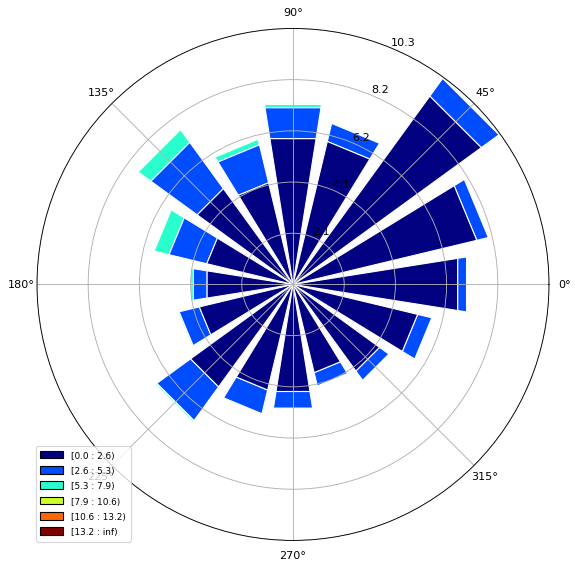

In [18]:
ax = WindroseAxes.from_ax()
ax.bar(data['wd'],data['WSPM'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

In [19]:
data.TEMP.describe()

count    420768.000000
mean         13.538976
std          11.430729
min         -19.900000
25%           3.100000
50%          14.500000
75%          23.200000
max          41.600000
Name: TEMP, dtype: float64

In the next graph, we find the correlation of each of the variable with each of the other variables. This is done to find out which attributes are strongly corelated to out target variable which is Temperature.

<AxesSubplot:>

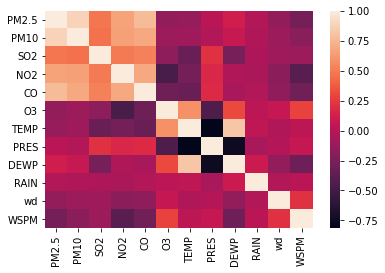

In [20]:
data1 = data.drop(['No','day','year','month','hour','station','PM25_AQI','PM10_AQI','SO2_AQI','NO2_AQI','O3_AQI','CO_AQI'], axis = 1)
sns.heatmap(data1.corr(), fmt=".2f")

We plot different graphs with different attributes to understand each of them in detail

Text(0, 0.5, 'Avg Temperature in *C')

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\dsola\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\dsola\anaconda3\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x0000022F412F13D0>
Exception in Tkinter callback
Traceba

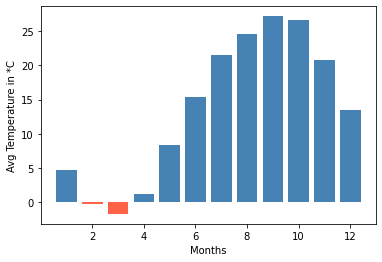

In [30]:
matplotlib.use("TkAgg")
numpy = data.groupby(["month"])["TEMP"].mean()
y1 = numpy < 0
y2 = numpy >= 0
pyplot.bar(data['month'].unique()[y1], numpy[y1], color='tomato')
pyplot.bar(data['month'].unique()[y2], numpy[y2], color='steelblue')
pyplot.xlabel('Months')
pyplot.ylabel('Avg Temperature in *C')

Text(0, 0.5, ' Avg Temperature in *C')

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\dsola\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\dsola\anaconda3\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x0000022F413ADE50>
Exception in Tkinter callback
Traceba

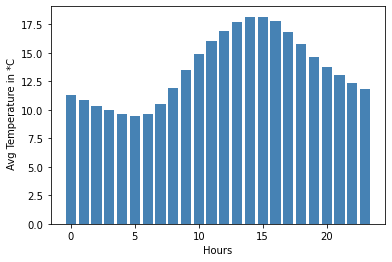

In [31]:
import matplotlib
matplotlib.use("TkAgg")
numpy = data.groupby(["hour"])["TEMP"].mean()
y1 = numpy < mean(numpy)
y2 = numpy >= mean(numpy)
pyplot.bar(data['hour'].unique(), numpy, color='tomato')
pyplot.bar(data['hour'].unique(), numpy, color='steelblue')
pyplot.xlabel('Hours')
pyplot.ylabel(' Avg Temperature in *C')

<AxesSubplot:xlabel='year', ylabel='CO'>

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\dsola\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\dsola\anaconda3\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x0000022F416EC460>
Exception in Tkinter callback
Traceba

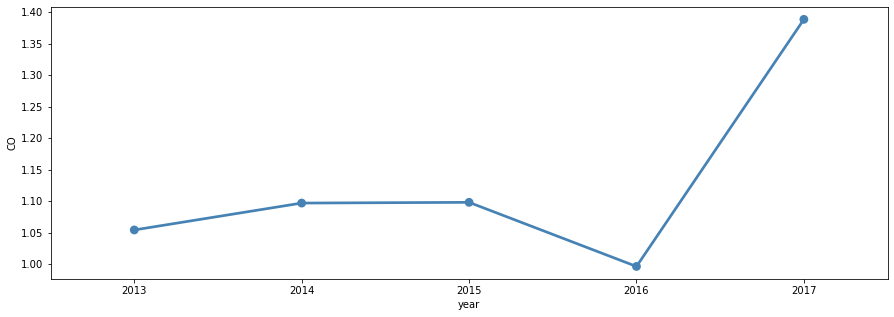

In [32]:
df = data[['CO','year']].groupby(["year"]).mean().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='year', y='CO', data=df,markers='o', color='steelblue')

<AxesSubplot:xlabel='year', ylabel='SO2'>

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\dsola\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\dsola\anaconda3\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x0000022F490C4970>
Exception in Tkinter callback
Traceba

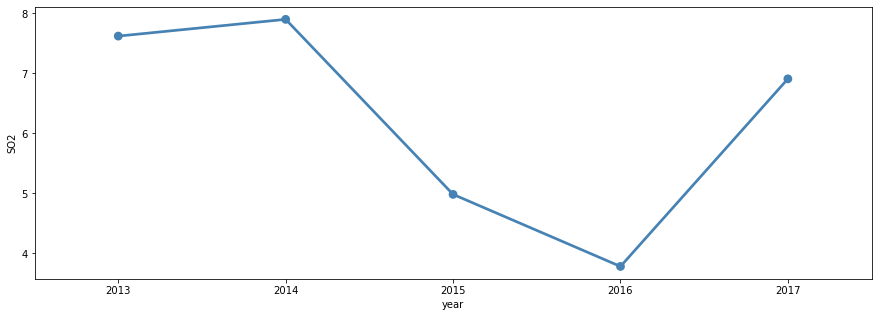

In [33]:
df = data[['SO2','year']].groupby(["year"]).mean().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='year', y='SO2', data=df,markers='o', color='steelblue')

<AxesSubplot:xlabel='year', ylabel='O3'>

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\dsola\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\dsola\anaconda3\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x0000022F416543D0>
Exception in Tkinter callback
Traceba

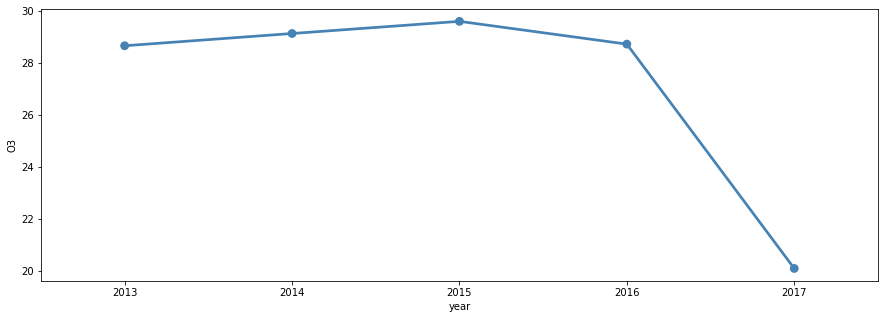

In [34]:
df = data[['O3','year']].groupby(["year"]).mean().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='year', y='O3', data=df,markers='o', color='steelblue')

<AxesSubplot:xlabel='year', ylabel='NO2'>

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\dsola\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\dsola\anaconda3\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x0000022F417072E0>
Exception in Tkinter callback
Traceba

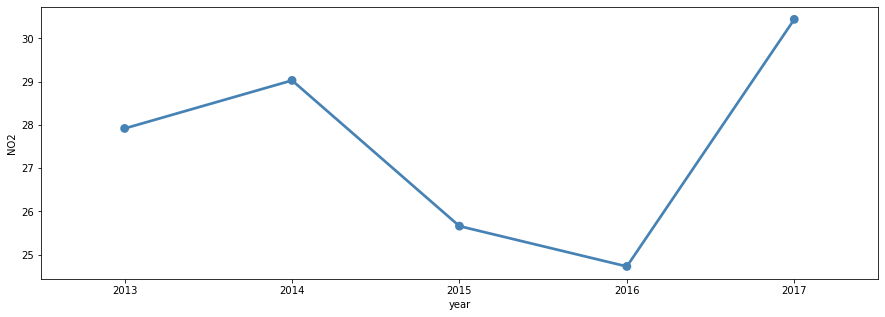

In [35]:
df = data[['NO2','year']].groupby(["year"]).mean().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='year', y='NO2', data=df,markers='o', color='steelblue')

<AxesSubplot:xlabel='month', ylabel='SO2'>

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\dsola\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\dsola\anaconda3\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x0000022F495F3A30>
Exception in Tkinter callback
Traceba

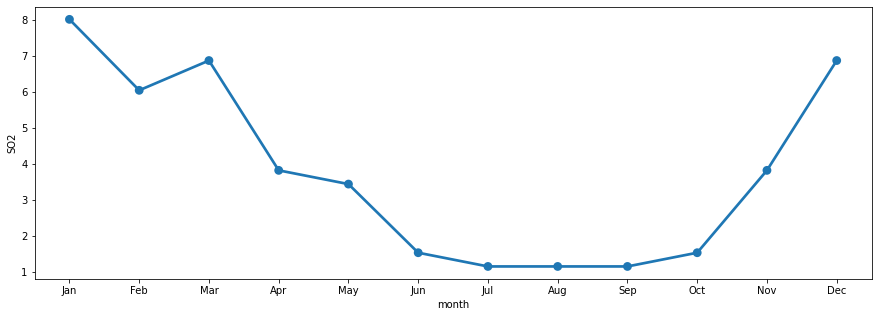

In [36]:
data.month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], inplace=True)
custom_dict = {'Jan':0, 'Feb':1,'Mar':2,'Apr':3,'May':4,'Jun':5,'Jul':6,'Aug':7,'Sep':8,'Oct':9,'Nov':10,'Dec':11}
df = data[['SO2','month','station']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=True)
df = df.iloc[df['month'].map(custom_dict).argsort()]
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='month', y='SO2', data=df)

Now to find out more about the pollutants in the atmosphere, we have categorized them as follows.The Air Quality Index is divided into 6 cateogories. These cateogories are explained below. These categories define how the pollutant affects various age groups and demographics of the society

![Air Quality Index](AQI.png)

Text(0, 0.5, 'Maximum Temp for Particle Size PM2.5')

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\dsola\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\dsola\anaconda3\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x0000022F41429610>
Exception in Tkinter callback
Traceba

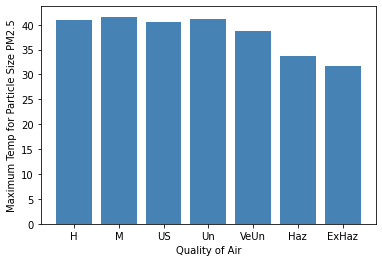

In [37]:
import matplotlib
matplotlib.use("TkAgg")
data['pm25_bins'] = pd.cut(data['PM25_AQI'], [0.0,50.0,100.0,150.0,200.0,300,400,500], labels=['H', 'M', 'US','Un','VeUn','Haz','ExHaz'])

# numpy = data.groupby([""])["TEMP"].mean()
# y1 = numpy < max(numpy)
# y2 = numpy >= max(numpy)
numpy = data.groupby(["pm25_bins"])["TEMP"].max()

pyplot.bar(data['pm25_bins'].unique(), numpy, color='steelblue')
# pyplot.bar(data['pm25_bins'].unique(), numpy, color='tomato')
pyplot.xlabel('Quality of Air')
pyplot.ylabel('Maximum Temp for Particle Size PM2.5')


Text(0, 0.5, 'Maximum Temp for Particle Size PM10')

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\dsola\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\dsola\anaconda3\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x0000022F4149B6D0>
Exception in Tkinter callback
Traceba

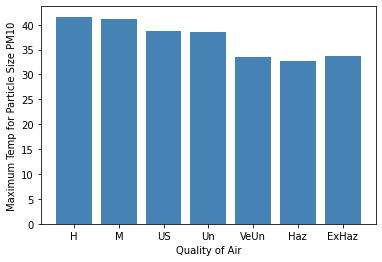

In [38]:
data['pm10_bins'] = pd.cut(data['PM10_AQI'], [0.0,50.0,100.0,150.0,200.0,300,400,500], labels=['H', 'M', 'US','Un','VeUn','Haz','ExHaz'])

# numpy = data.groupby([""])["TEMP"].mean()
y1 = numpy < max(numpy)
y2 = numpy >= max(numpy)
numpy = data.groupby(["pm10_bins"])["TEMP"].max()

pyplot.bar(data['pm10_bins'].unique(), numpy, color='steelblue')
# pyplot.bar(data['pm10_bins'].unique(), numpy, color='tomato')
pyplot.xlabel('Quality of Air')
pyplot.ylabel('Maximum Temp for Particle Size PM10')

Text(0, 0.5, 'Average Concentration of SO2 Gas')

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\dsola\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\dsola\anaconda3\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\dsola\anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x0000022F414FF760>
Exception in Tkinter callback
Traceba

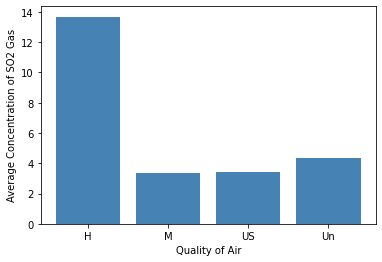

In [39]:
data['so_bins'] = pd.cut(data['SO2_AQI'], [0.0,50.0,100.0,150.0,200.0 ], labels=['H', 'M', 'US','Un'])

# numpy = data.groupby([""])["TEMP"].mean()
y1 = numpy < max(numpy)
y2 = numpy >= max(numpy)
numpy = data.groupby(["so_bins"])["TEMP"].mean()

pyplot.bar(data['so_bins'].unique(), numpy, color='steelblue')
pyplot.xlabel('Quality of Air')
pyplot.ylabel('Average Concentration of SO2 Gas')


## Regression Analysis

I used various Regression methods like simple linear regression, multiple linear regression, polynomial regression and many other regression models. However, in this Jupyter Notebook, I have only shown results of only those regression models which gave me an good score and a low error.  

Therefore, importing the libraries and deciding which Regression models that can be used in order to predict the Temperature accurately and without errors. 

In [40]:
import pandas as pd
import numpy as np
import random
import sklearn.metrics
import math

In [41]:
data = pd.read_csv("..\\Data\\Preprocessed Data\\Preprocessed_data.csv")
data = data.drop(['Unnamed: 0','No'], axis = 1)

#### There are 3 models created in order to depict the importance of feature creation and predict the temperature based on other attributes. 

Feature1 : Uses Pressure, Rain, and Wind speed in order to predict the temperature.

Feature2 : Uses the 4 Pollutant concentration and 2 particle sizes concentration along with the previous 3 features to predict temperature.

Feature3 : Uses the created features (Air quality indices of 6 pollutants) along with the previous 3 features to predict the temperature.

###### The training and testing set is created. 
'y' is the target variable and only one attribute is needed to be predicted. 

'X1', 'X2', 'X3' are the feature sets with different types and counts of attributes. 

'X1_train', 'X2_train', 'X3_train' are the training sets that will be trained with 'y1_train', 'y2_train', 'y3_train' respectively.

In [42]:
temp_array = data['TEMP'].values
y = temp_array.reshape(-1,1) 

In [43]:
feature1 = ['PRES','RAIN','WSPM', 'DEWP']

feature2 = ['PM2.5','PM10','SO2','NO2','O3','CO','PRES','RAIN','WSPM', 'DEWP']

feature3 = ['PM25_AQI','PM10_AQI','SO2_AQI','NO2_AQI','O3_AQI','CO_AQI','PRES','RAIN','WSPM','DEWP']

X1 = data.loc[:, feature1].values
X2 = data.loc[:, feature2].values
X3 = data.loc[:, feature3].values

In [45]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.2, random_state = 0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.2, random_state = 0)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size = 0.2, random_state = 0)

### Decision Tree Regression

In [46]:
from sklearn.tree import DecisionTreeRegressor

dtree1 = DecisionTreeRegressor()
dtree2 = DecisionTreeRegressor()
dtree3 = DecisionTreeRegressor()

dtree1.fit(X1_train, y1_train)

dtree2.fit(X2_train, y2_train)

dtree3.fit(X3_train, y3_train)

print(" R^2 Score with feature1 <-- on test set: {}".format(dtree1.score(X1_test, y1_test)))

print(" R^2 Score with feature2 <-- on test set: {}".format(dtree2.score(X2_test, y2_test)))

print(" R^2 Score with feature3 <-- on test set: {}".format(dtree3.score(X3_test, y3_test)))

 R^2 Score with feature1 <-- on test set: 0.8796772721579974
 R^2 Score with feature2 <-- on test set: 0.8915347039782078
 R^2 Score with feature3 <-- on test set: 0.8911188155587005


### Ridge regression

In [47]:
from sklearn.linear_model import Ridge

ridge1 = Ridge(alpha = 1.0, tol = 1, solver = 'svd').fit(X1_train, y1_train)
ridge2 = Ridge(alpha = 1.0, tol = 1, solver = 'svd').fit(X2_train, y2_train)
ridge3 = Ridge(alpha = 1.0, tol = 1, solver = 'svd').fit(X3_train, y3_train)


print(" R^2 Score with feature1 <-- on test set: {}".format(ridge1.score(X1_test, y1_test)))

print(" R^2 Score with feature2 <-- on test set: {}".format(ridge2.score(X2_test, y2_test)))

print(" R^2 Score with feature3 <-- on test set: {}".format(ridge3.score(X3_test, y3_test)))

 R^2 Score with feature1 <-- on test set: 0.8137456586577634
 R^2 Score with feature2 <-- on test set: 0.873592083039969
 R^2 Score with feature3 <-- on test set: 0.8750426117823807


### Lasso Regression

In [48]:
from sklearn.linear_model import Lasso

lasso1 = Lasso(alpha=1.0, precompute = False,selection = 'random',tol = 0.000001)
lasso1.fit(X1_train,y1_train)

lasso2 = Lasso(alpha=1.0, precompute = False,selection = 'random',tol = 0.000001)
lasso2.fit(X2_train,y2_train)


lasso3 = Lasso(alpha=1.0, precompute = False,selection = 'random',tol = 0.000001)
lasso3.fit(X3_train,y3_train)


print(" R^2 Score with feature1 <-- on test set: {}".format(lasso1.score(X1_test, y1_test)))

print(" R^2 Score with feature2 <-- on test set: {}".format(lasso2.score(X2_test, y2_test)))

print(" R^2 Score with feature3 <-- on test set: {}".format(lasso3.score(X3_test, y3_test)))

 R^2 Score with feature1 <-- on test set: 0.8055534761294745
 R^2 Score with feature2 <-- on test set: 0.8590315026443984
 R^2 Score with feature3 <-- on test set: 0.8650865099945046


### ElastiNet Regression

In [49]:
from sklearn.linear_model import ElasticNet

enet1 = ElasticNet().fit(X1_train,y1_train)
enet2 = ElasticNet().fit(X2_train,y2_train)
enet3 = ElasticNet().fit(X3_train,y3_train)


print(" R^2 Score with feature1 <-- on test set: {}".format(enet1.score(X1_test, y1_test)))

print(" R^2 Score with feature2 <-- on test set: {}".format(enet2.score(X2_test, y2_test)))

print(" R^2 Score with feature3 <-- on test set: {}".format(enet3.score(X3_test, y3_test)))


 R^2 Score with feature1 <-- on test set: 0.8035776722446638
 R^2 Score with feature2 <-- on test set: 0.8625700148276056
 R^2 Score with feature3 <-- on test set: 0.8691704577793922




Model | R^2 Score for Feature1 | R^2 Score for Feature2 | R^2 Score for Feature3
----- | ---------------------- | ---------------------- | ---------------------- |
DecisionTree Regression | 0.7226228398476233 |  0.7255236235567473 | 0.7254002902689967
Ridge Regression | 0.668813412604142 | 0.7502428511220475 | 0.7507785142635952
Lasso Regression | 0.6632206984150215 | 0.7437820410345286 | 0.7502508124379266
ElastiNet Regression | 0.6660343309393048 | 0.7439282443449935 | 0.7504926807317898

## Model Improvements and Metrics

### Forward Selection

Implemented Forward Selection in order to find the best features that will affect the data. Forward Selection creates subsets of features and analyzes the p-value using Ordinary Least Squares (OLS). The subsets with the least p-value is returned so that the null hypothesis can be rejected. We have taken the significance level of 0.05 in order to find the best features. New and Better metrics are added in order to better judge the accuracy of the model. I have now used Adjusted R^2 Score and Root Mean Square Errors in order to check accuracy.

Dropping columns of whose corelation cannot be found out.

In [50]:
data1 = data.drop(['day','year','month','hour','station','TEMP'], axis = 1)

In [51]:
from statsmodels.api import OLS
import statsmodels.api as sm

def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target.astype(float), sm.add_constant(data[best_features+[new_column]]).astype(float)).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features
target = data['TEMP']
feature4 = forward_selection(data1,target) 

In [52]:
feature4

['PM2.5',
 'PRES',
 'CO',
 'PM25_AQI',
 'wd',
 'WSPM',
 'NO2_AQI',
 'O3',
 'DEWP',
 'PM10_AQI',
 'RAIN',
 'O3_AQI',
 'CO_AQI',
 'SO2',
 'PM10',
 'NO2',
 'SO2_AQI']

Splitting up Test-Train data for feature4

In [53]:
X4 = data.loc[:, feature4].values
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size = 0.2, random_state = 0)

In [54]:
dtree4 = DecisionTreeRegressor()
dtree4.fit(X4_train, y4_train)
print(" R^2 Score with feature4 for DecisionTree Regressor <-- on test set: {}".format(dtree4.score(X4_test, y4_test)))

 R^2 Score with feature4 for DecisionTree Regressor <-- on test set: 0.8947462631191094


In [55]:
ridge4 = Ridge(alpha = 1.0, tol = 1, solver = 'svd')
ridge4.fit(X4_train, y4_train)
print(" R^2 Score with feature4 <-- on test set: {}".format(ridge4.score(X4_test, y4_test)))

 R^2 Score with feature4 <-- on test set: 0.8770333998103519


In [56]:
lasso4 = Lasso(alpha=1.0, precompute = False,selection = 'random',tol = 0.000001)
lasso4.fit(X4_train,y4_train)
print(" R^2 Score with feature4 for Lasso Regressor<-- on test set: {}".format(lasso4.score(X4_test, y4_test)))

 R^2 Score with feature4 for Lasso Regressor<-- on test set: 0.8654990339385904


In [57]:
enet4 = ElasticNet().fit(X4_train,y4_train)
print(" R^2 Score with feature3 for ElastiNet Regressor<-- on test set: {}".format(enet4.score(X4_test, y4_test)))

 R^2 Score with feature3 for ElastiNet Regressor<-- on test set: 0.8697053879497723




Model | R^2 Score for Feature1 | R^2 Score for Feature2 | R^2 Score for Feature3 | R^2 Score for Feature4 |
----- | ---------------------- | ---------------------- | ---------------------- | ---------------------- |
DecisionTree Regression | 0.7226228398476233 |  0.7255236235567473 | 0.7254002902689967 | 0.8947462631191094
Ridge Regression | 0.668813412604142 | 0.7502428511220475 | 0.7507785142635952 | 0.8770333998103519
Lasso Regression | 0.6632206984150215 | 0.7437820410345286 | 0.7502508124379266 | 0.8654990339385904
ElastiNet Regression | 0.6660343309393048 | 0.7439282443449935 | 0.7504926807317898 | 0.8697053879497723

### Adjusted R-Squared and Root Mean Squared Error


#### DecisionTree

In [58]:
R_Score_DT1 = dtree1.score(X1_test,y1_test)
Adj_R_Score_DT1 = 1 - (1-R_Score_DT1)*(len(y1_train)-1)/(len(y1_train)-X1_train.shape[1]-1)
print("Adjusted R^2 Score with feature1 <-- on test set: {}".format(Adj_R_Score_DT1))

predicted_values = dtree1.predict(X1_test)
mse = sklearn.metrics.mean_squared_error(y1_test, predicted_values)
print("Mean Squared Error with feature1 <-- on test set: {} ".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Squared Error with feature1 <-- on test set: {} ".format(rmse))

Adjusted R^2 Score with feature1 <-- on test set: 0.8796758423361228
Mean Squared Error with feature1 <-- on test set: 15.770480584113148 
Root Mean Squared Error with feature1 <-- on test set: 3.971206439372442 


In [59]:
R_Score_DT2 = dtree2.score(X2_test,y2_test)
Adj_R_Score_DT2 = 1 - (1-R_Score_DT2)*(len(y2_train)-1)/(len(y2_train)-X2_train.shape[1]-1)
print("Adjusted R^2 Score with feature2 <-- on test set: {}".format(Adj_R_Score_DT2))

predicted_values = dtree2.predict(X2_test)
mse = sklearn.metrics.mean_squared_error(y2_test, predicted_values)
print("Mean Squared Error with feature2 <-- on test set: {} ".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Squared Error with feature2 <-- on test set: {} ".format(rmse))

Adjusted R^2 Score with feature2 <-- on test set: 0.8915314816273665
Mean Squared Error with feature2 <-- on test set: 14.216348612108478 
Root Mean Squared Error with feature2 <-- on test set: 3.7704573478702126 


In [60]:
R_Score_DT3 = dtree3.score(X3_test,y3_test)
Adj_R_Score_DT3 = 1 - (1-R_Score_DT3)*(len(y3_train)-1)/(len(y3_train)-X3_train.shape[1]-1)
print("Adjusted R^2 Score with feature3 <-- on test set: {}".format(Adj_R_Score_DT3))

predicted_values = dtree3.predict(X3_test)
mse = sklearn.metrics.mean_squared_error(y3_test, predicted_values)
print("Mean Squared Error with feature3 <-- on test set: {} ".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Squared Error with feature3 <-- on test set: {} ".format(rmse))

Adjusted R^2 Score with feature3 <-- on test set: 0.8911155808524014
Mean Squared Error with feature3 <-- on test set: 14.27085834906864 
Root Mean Squared Error with feature3 <-- on test set: 3.7776789632085785 


In [61]:
R_Score_DT4 = dtree4.score(X4_test,y4_test)
Adj_R_Score_DT4 = 1 - (1-R_Score_DT4)*(len(y4_train)-1)/(len(y4_train)-X4_train.shape[1]-1)
print("Adjusted R^2 Score with feature4 <-- on test set: {}".format(Adj_R_Score_DT4))

predicted_values = dtree4.predict(X4_test)
mse = sklearn.metrics.mean_squared_error(y4_test, predicted_values)
print("Mean Squared Error with feature4 <-- on test set: {} ".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Squared Error with feature4 <-- on test set: {} ".format(rmse))

Adjusted R^2 Score with feature4 <-- on test set: 0.8947409472106406
Mean Squared Error with feature4 <-- on test set: 13.795415410337762 
Root Mean Squared Error with feature4 <-- on test set: 3.7142180079173817 


#### Ridge Tree

In [62]:
R_Score_RR1 = ridge1.score(X1_test,y1_test)
Adj_R_Score_RR1 = 1 - (1-R_Score_RR1)*(len(y1_train)-1)/(len(y1_train)-X1_train.shape[1]-1)
print("Adjusted R^2 Score with feature1 <-- on test set: {}".format(Adj_R_Score_RR1))

predicted_values = ridge1.predict(X1_test)
mse = sklearn.metrics.mean_squared_error(y1_test, predicted_values)
print("Mean Squared Error with feature1 <-- on test set: {} ".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Squared Error with feature1 <-- on test set: {} ".format(rmse))

Adjusted R^2 Score with feature1 <-- on test set: 0.8137434453557858
Mean Squared Error with feature1 <-- on test set: 24.412016969076387 
Root Mean Squared Error with feature1 <-- on test set: 4.94085184650141 


In [63]:
R_Score_RR2 = ridge2.score(X2_test,y2_test)
Adj_R_Score_RR2 = 1 - (1-R_Score_RR2)*(len(y2_train)-1)/(len(y2_train)-X2_train.shape[1]-1)
print("Adjusted R^2 Score with feature2 <-- on test set: {}".format(Adj_R_Score_RR2))

predicted_values = ridge2.predict(X2_test)
mse = sklearn.metrics.mean_squared_error(y2_test, predicted_values)
print("Mean Squared Error with feature2 <-- on test set: {} ".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Squared Error with feature2 <-- on test set: {} ".format(rmse))

Adjusted R^2 Score with feature2 <-- on test set: 0.8735883276391865
Mean Squared Error with feature2 <-- on test set: 16.56805522821977 
Root Mean Squared Error with feature2 <-- on test set: 4.07038760171802 


In [64]:
R_Score_RR3 = ridge3.score(X3_test,y3_test)
Adj_R_Score_RR3 = 1 - (1-R_Score_RR3)*(len(y3_train)-1)/(len(y3_train)-X3_train.shape[1]-1)
print("Adjusted R^2 Score with feature3 <-- on test set: {}".format(Adj_R_Score_RR3))

predicted_values = ridge3.predict(X3_test)
mse = sklearn.metrics.mean_squared_error(y3_test, predicted_values)
print("Mean Squared Error with feature3 <-- on test set: {} ".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Squared Error with feature3 <-- on test set: {} ".format(rmse))

Adjusted R^2 Score with feature3 <-- on test set: 0.8750388994747597
Mean Squared Error with feature3 <-- on test set: 16.377937070335758 
Root Mean Squared Error with feature3 <-- on test set: 4.046966403410801 


In [65]:
R_Score_RR4 = ridge4.score(X4_test,y4_test)
Adj_R_Score_RR4 = 1 - (1-R_Score_RR4)*(len(y4_train)-1)/(len(y4_train)-X4_train.shape[1]-1)
print("Adjusted R^2 Score with feature4 <-- on test set: {}".format(Adj_R_Score_RR4))

predicted_values = ridge4.predict(X4_test)
mse = sklearn.metrics.mean_squared_error(y4_test, predicted_values)
print("Mean Squared Error with feature4 <-- on test set: {} ".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Squared Error with feature4 <-- on test set: {} ".format(rmse))

Adjusted R^2 Score with feature4 <-- on test set: 0.877027189302196
Mean Squared Error with feature4 <-- on test set: 16.117008112812204 
Root Mean Squared Error with feature4 <-- on test set: 4.014599371395881 


#### Lasso Regression

In [66]:
R_Score_La1 = lasso1.score(X1_test,y1_test)
Adj_R_Score_La1 = 1 - (1-R_Score_La1)*(len(y1_train)-1)/(len(y1_train)-X1_train.shape[1]-1)
print("Adjusted R^2 Score with feature1 <-- on test set: {}".format(Adj_R_Score_La1))

predicted_values = lasso1.predict(X1_test)
mse = sklearn.metrics.mean_squared_error(y1_test, predicted_values)
print("Mean Squared Error with feature1 <-- on test set: {} ".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Squared Error with feature1 <-- on test set: {} ".format(rmse))

Adjusted R^2 Score with feature1 <-- on test set: 0.8055511654779605
Mean Squared Error with feature1 <-- on test set: 25.485751398315212 
Root Mean Squared Error with feature1 <-- on test set: 5.048341450250291 


In [67]:
R_Score_La2 = lasso2.score(X2_test,y2_test)
Adj_R_Score_La2 = 1 - (1-R_Score_La2)*(len(y2_train)-1)/(len(y2_train)-X2_train.shape[1]-1)
print("Adjusted R^2 Score with feature2 <-- on test set: {}".format(Adj_R_Score_La2))

predicted_values = lasso2.predict(X2_test)
mse = sklearn.metrics.mean_squared_error(y2_test, predicted_values)
print("Mean Squared Error with feature2 <-- on test set: {} ".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Squared Error with feature2 <-- on test set: {} ".format(rmse))

Adjusted R^2 Score with feature2 <-- on test set: 0.8590273146693252
Mean Squared Error with feature2 <-- on test set: 18.476483956026648 
Root Mean Squared Error with feature2 <-- on test set: 4.2984280796619885 


In [68]:
R_Score_La3 = lasso3.score(X3_test,y3_test)
Adj_R_Score_La3 = 1 - (1-R_Score_La3)*(len(y3_train)-1)/(len(y3_train)-X3_train.shape[1]-1)
print("Adjusted R^2 Score with feature3 <-- on test set: {}".format(Adj_R_Score_La3))

predicted_values = lasso3.predict(X3_test)
mse = sklearn.metrics.mean_squared_error(y3_test, predicted_values)
print("Mean Squared Error with feature3 <-- on test set: {} ".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Squared Error with feature3 <-- on test set: {} ".format(rmse))

Adjusted R^2 Score with feature3 <-- on test set: 0.8650825019051529
Mean Squared Error with feature3 <-- on test set: 17.682865181218748 
Root Mean Squared Error with feature3 <-- on test set: 4.205099901455226 


In [69]:
R_Score_La4 = lasso4.score(X4_test,y4_test)
Adj_R_Score_La4 = 1 - (1-R_Score_La4)*(len(y4_train)-1)/(len(y4_train)-X4_train.shape[1]-1)
print("Adjusted R^2 Score with feature4 <-- on test set: {}".format(Adj_R_Score_La4))

predicted_values = lasso4.predict(X4_test)
mse = sklearn.metrics.mean_squared_error(y4_test, predicted_values)
print("Mean Squared Error with feature4 <-- on test set: {} ".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Squared Error with feature4 <-- on test set: {} ".format(rmse))

Adjusted R^2 Score with feature4 <-- on test set: 0.8654922408797809
Mean Squared Error with feature4 <-- on test set: 17.628796419918494 
Root Mean Squared Error with feature4 <-- on test set: 4.198666028623674 


#### ElastiNet Regression

In [70]:
R_Score_EN1 = enet1.score(X1_test,y1_test)
Adj_R_Score_EN1 = 1 - (1-R_Score_EN1)*(len(y1_train)-1)/(len(y1_train)-X1_train.shape[1]-1)
print("Adjusted R^2 Score with feature1 <-- on test set: {}".format(Adj_R_Score_EN1))

predicted_values = enet1.predict(X1_test)
mse = sklearn.metrics.mean_squared_error(y1_test, predicted_values)
print("Mean Squared Error with feature1 <-- on test set: {} ".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Squared Error with feature1 <-- on test set: {} ".format(rmse))

Adjusted R^2 Score with feature1 <-- on test set: 0.8035753381142305
Mean Squared Error with feature1 <-- on test set: 25.74471641151153 
Root Mean Squared Error with feature1 <-- on test set: 5.073925148394636 


In [71]:
R_Score_EN2 = enet2.score(X2_test,y2_test)
Adj_R_Score_EN2 = 1 - (1-R_Score_EN2)*(len(y2_train)-1)/(len(y2_train)-X2_train.shape[1]-1)
print("Adjusted R^2 Score with feature2 <-- on test set: {}".format(Adj_R_Score_EN2))

predicted_values = enet2.predict(X2_test)
mse = sklearn.metrics.mean_squared_error(y2_test, predicted_values)
print("Mean Squared Error with feature2 <-- on test set: {} ".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Squared Error with feature2 <-- on test set: {} ".format(rmse))

Adjusted R^2 Score with feature2 <-- on test set: 0.8625659319767347
Mean Squared Error with feature2 <-- on test set: 18.012697615052108 
Root Mean Squared Error with feature2 <-- on test set: 4.244136851593279 


In [72]:
R_Score_EN3 = enet3.score(X3_test,y3_test)
Adj_R_Score_EN3 = 1 - (1-R_Score_EN3)*(len(y3_train)-1)/(len(y3_train)-X3_train.shape[1]-1)
print("Adjusted R^2 Score with feature3 <-- on test set: {}".format(Adj_R_Score_EN3))

predicted_values = enet3.predict(X3_test)
mse = sklearn.metrics.mean_squared_error(y3_test, predicted_values)
print("Mean Squared Error with feature3 <-- on test set: {} ".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Squared Error with feature3 <-- on test set: {} ".format(rmse))


Adjusted R^2 Score with feature3 <-- on test set: 0.8691665710183645
Mean Squared Error with feature3 <-- on test set: 17.14758959028741 
Root Mean Squared Error with feature3 <-- on test set: 4.140964813939791 


In [73]:
R_Score_EN4 = enet4.score(X4_test,y4_test)
Adj_R_Score_EN4 = 1 - (1-R_Score_EN4)*(len(y4_train)-1)/(len(y4_train)-X4_train.shape[1]-1)
print("Adjusted R^2 Score with feature4 <-- on test set: {}".format(Adj_R_Score_EN4))

predicted_values = enet4.predict(X4_test)
mse = sklearn.metrics.mean_squared_error(y4_test, predicted_values)
print("Mean Squared Error with feature1 <-- on test set: {} ".format(mse))
rmse = math.sqrt(mse)
print("Root Mean Squared Error with feature1 <-- on test set: {} ".format(rmse))

Adjusted R^2 Score with feature4 <-- on test set: 0.8696988073356091
Mean Squared Error with feature1 <-- on test set: 17.0774772680592 
Root Mean Squared Error with feature1 <-- on test set: 4.132490443795267 



The Root Mean Squared Errors are given as follows :

Model |  Feature1 | Feature2 | Feature3 | Feature4 |
----- | --------- | -------- | -------- | -------- |
DecisionTree Regression | 3.9734723263825984  | 3.774423598313993  | 3.7726103630097145 | 2.797486270628397 
Ridge Regression | 4.94085184650141  | 4.07038760171802 | 4.046966403410801  | 4.014335191025011
Lasso Regression | 5.048341677920922 | 4.298428227724754 | 4.20510022907211 | 4.199118234990604
ElastiNet Regression | 5.073925148394636 | 4.244136851593279 | 4.140964813939791 | 4.132578040373532

## Future Scope

These Machine Learning Models can be used to predict the Temperature given the data attributes. These ML Models can be further used to identify which particular pollutant has the most effect on Temperature and government entities can take necessary steps required to curb air pollution. 